In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
f1 = pd.read_csv('penguins_lter.csv')

In [3]:
f1.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN


In [4]:
f1.shape

(344, 17)

## Deleting Unwanted variables

In [5]:
f1 = f1.drop(['studyName','Sample Number','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Sex', 'Date Egg', 'Stage', 'Individual ID','Comments'], axis = 1)

In [6]:
f1.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Handeling Null values and duplicates

In [7]:
f1.isnull().sum()

Species                0
Region                 0
Island                 0
Clutch Completion      0
Culmen Length (mm)     2
Culmen Depth (mm)      2
Flipper Length (mm)    2
Body Mass (g)          2
dtype: int64

In [8]:
#Fill the null values
f1 = f1.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [9]:
f1.isnull().sum()

Species                0
Region                 0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
dtype: int64

In [10]:
f1.duplicated().sum()

0

### Distribution of Target


Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64


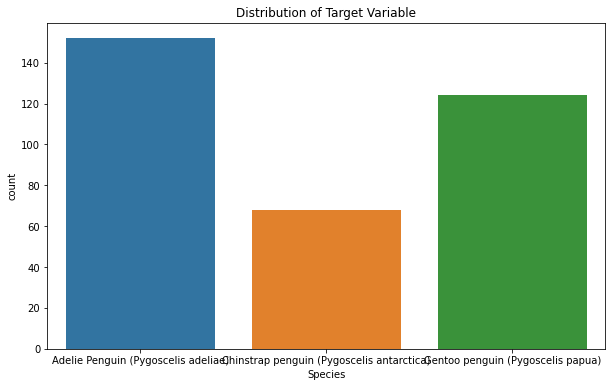

In [11]:
plt.figure(figsize=(10,6))
sns.countplot('Species', data=f1).set_title('Distribution of Target Variable')
print(f1.Species.value_counts())

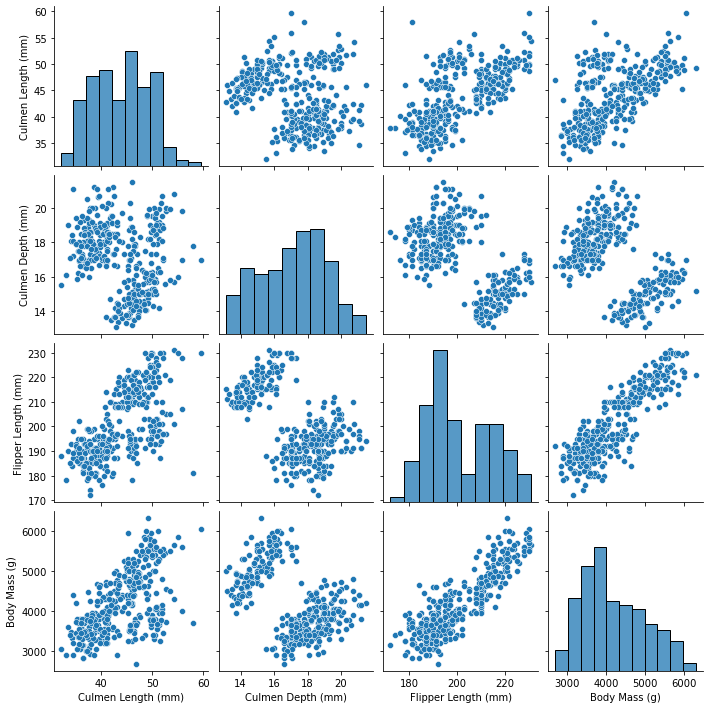

In [12]:
sns.pairplot(f1, kind = "scatter")

In [13]:
f1.dtypes

Species                 object
Region                  object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
dtype: object

In [14]:
f1["Species"] = f1["Species"].map({'Adelie Penguin (Pygoscelis adeliae)' :0, 'Chinstrap penguin (Pygoscelis antarctica)':1 ,'Gentoo penguin (Pygoscelis papua)':2 }).astype(int) #mapping numbers
f1.head()

,Species,Region,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,0,Anvers,Torgersen,Yes,39.1,18.7,181.0,3750.0
1,0,Anvers,Torgersen,Yes,39.5,17.4,186.0,3800.0
2,0,Anvers,Torgersen,Yes,40.3,18.0,195.0,3250.0
3,0,Anvers,Torgersen,Yes,41.1,17.0,190.0,3800.0
4,0,Anvers,Torgersen,Yes,36.7,19.3,193.0,3450.0


In [15]:
f1 = pd.get_dummies(f1, columns=['Region','Island', 'Clutch Completion'], prefix=['Region','Island','Clutch Completion'])

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Region_Anvers,Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes
Species,1.000000,0.727832,-0.741363,0.849256,0.746913,NaN,0.610710,-0.311589,-0.434574,-0.032682,0.032682
Culmen Length (mm),0.727832,1.000000,-0.234635,0.656856,0.595720,NaN,0.238366,0.036188,-0.381137,0.035790,-0.035790
Culmen Depth (mm),-0.741363,-0.234635,1.000000,-0.582472,-0.471339,NaN,-0.630442,0.455932,0.268633,0.090270,-0.090270
Flipper Length (mm),0.849256,0.656856,-0.582472,1.000000,0.871302,NaN,0.608681,-0.416423,-0.291225,-0.113530,0.113530
Body Mass (g),0.746913,0.595720,-0.471339,0.871302,1.000000,NaN,0.624998,-0.457121,-0.259444,-0.129598,0.129598


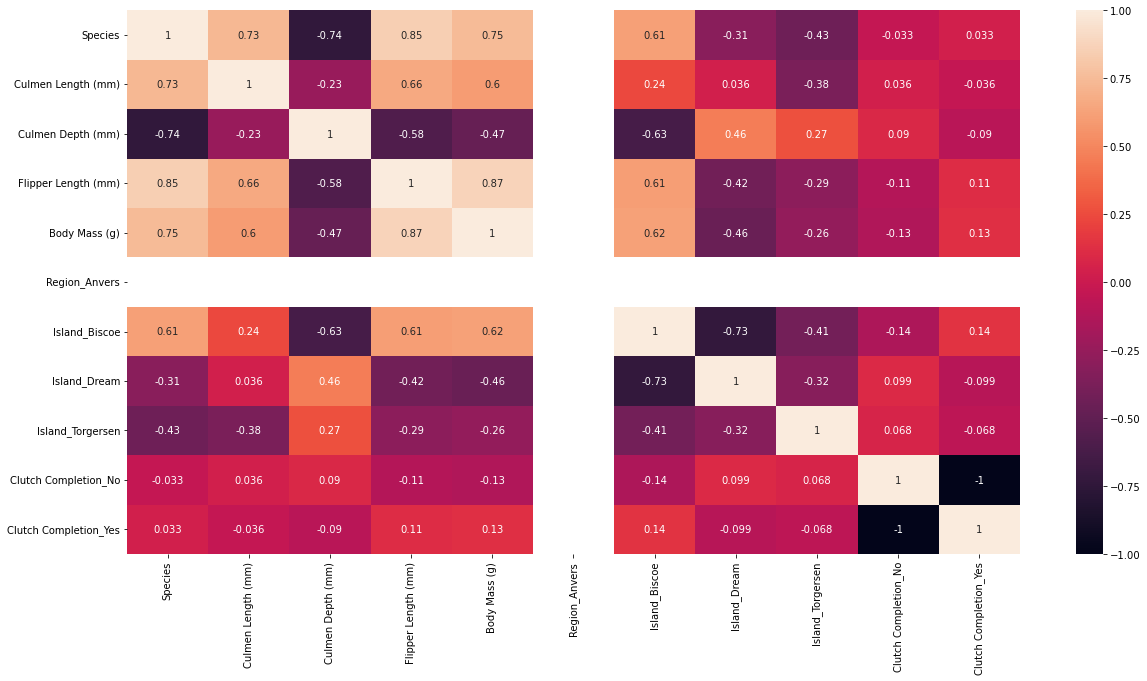

In [16]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= f1.corr()
sns.heatmap(c,annot=True)
c.head()

## Preprocessing

In [17]:
#pre-processing 
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(f1.drop("Species", axis=1))

StandardScaler()

In [20]:
scaled_features = scaler.transform(f1.drop('Species', axis=1))

In [21]:
X = scaled_features
Y = f1["Species"]

In [22]:
len(X), len(Y)

(344, 344)

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle = True) 

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 10)
(35, 10)
(309,)
(35,)


## Without Hyper parametre Tunning 

## SVM Classifier

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [26]:
cls = SVC(C=50).fit(X_train, y_train)
#C is penalty to model

In [27]:
# train and test accuracy
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 100.00%
Test Accuracy: 100.00%


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



### Decision Tree

In [29]:
#we will use decision tree model for better accuracy 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Decision Tree Accuracy:{:.2f}%".format(model.score(X_test, y_test) * 100))

Decision Tree Accuracy:94.29%


In [30]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00        13

    accuracy                           0.94        35
   macro avg       0.95      0.93      0.94        35
weighted avg       0.95      0.94      0.94        35



## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'liblinear', penalty = 'l1')
clf.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [32]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        13

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [34]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9714285714285714


## Grid Search CV

# SVM

In [35]:
# Import necessary packages
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [36]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['sigmoid']}
# Grid Search CV
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)


# fitting the model for grid search
grid_svm.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.839 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.903 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.742 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.823 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.918 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.984 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.984 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.952 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.984 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.823 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid

[CV 1/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.968 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.968 total time=   0.0s
[CV 3/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.984 total time=   0.0s
[CV 4/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.984 total time=   0.0s
[CV 5/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.984 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.984 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.984 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.984 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 3/5] END C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']},
             verbose=3)

In [37]:
# print best parameter after tuning
print("Best Paramter After tunning:", grid_svm.best_params_)

# print how our model looks after hyper-parameter tuning
print("Model After Tunning:", grid_svm.best_estimator_)


Best Paramter After tunning: {'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}
Model After Tunning: SVC(C=10, gamma=0.01, kernel='sigmoid')


In [38]:
grid_predictions_svm = grid_svm.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_svm))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        13

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



# Logistic Regression

In [39]:
# parameter grid
parameters_svm = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}


In [40]:
logreg = LogisticRegression()
clf_svm = GridSearchCV(logreg,                    # model
                   param_grid = parameters_svm,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)        

In [41]:
clf_svm.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [42]:
print("Best Tuned Hyperparameters :", clf_svm.best_params_)
print("Accuracy at Tunned Hyperparameters :",clf_svm.best_score_)

Best Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy at Tunned Hyperparameters : 0.9966666666666667


# Random Forest

In [43]:
rfc = RandomForestClassifier(random_state=42)

In [44]:
param_grid_rfc = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [45]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [46]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

### Model with Best Parameters

In [47]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')

In [48]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=42)

In [49]:
pred_rfc=rfc1.predict(X_test)

In [50]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred_rfc))

Accuracy for Random Forest on CV data:  0.9428571428571428


# Decision Tree 

In [51]:
dt =DecisionTreeClassifier(random_state=42)

In [52]:
param_grid_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), }

In [53]:
CV_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv= 5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [54]:
CV_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5}

### Model with best Parameters

In [55]:
dt1 =DecisionTreeClassifier(random_state=42, max_depth=4, criterion='entropy')

In [56]:
dt1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [57]:
pred_dt1 =dt1.predict(X_test)

In [58]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred_dt1))

Accuracy for Random Forest on CV data:  0.9428571428571428


# Randomized SearchCV

# 1.Support Vector Machine

In [59]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['sigmoid']}
Random_svm = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
Random_svm.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.452 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.452 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.452 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.452 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.459 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.984 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.952 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.984 total time=   0.0s
[CV 1/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.823 total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, kernel=sigmoid;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['sigmoid']},
                   verbose=3)

In [60]:
# print best parameter after tuning
print("Best Paramter After tunning:", Random_svm.best_params_)

# print how our model looks after hyper-parameter tuning
print("Model After Tunning:", Random_svm.best_estimator_)


Best Paramter After tunning: {'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}
Model After Tunning: SVC(C=10, gamma=0.01, kernel='sigmoid')


In [61]:
random_predictions_svm = Random_svm.predict(X_test)

# print classification report
print(classification_report(y_test, random_predictions_svm))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        13

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



# 2. Logistic Regression

In [62]:
from scipy.stats import uniform
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
distributions = dict(C= uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
log_random = RandomizedSearchCV(logistic, distributions, random_state=0)
log_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=200, random_state=0,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FF30D8DD90>,
                                        'penalty': ['l2', 'l1']},
                   random_state=0)

In [63]:
print("Best Tuned Hyperparameters :", log_random.best_params_)
print("Accuracy at Tunned Hyperparameters :",log_random.best_score_)

Best Tuned Hyperparameters : {'C': 2.195254015709299, 'penalty': 'l1'}
Accuracy at Tunned Hyperparameters : 0.9934955050237969


# 3.Random Forest

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [65]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [66]:
print("Best Tuned Hyperparameters :", rf_random.best_params_)
print("Accuracy at Tunned Hyperparameters :",rf_random.best_score_)

Best Tuned Hyperparameters : {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Accuracy at Tunned Hyperparameters : 0.9584783969068821


In [67]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

Model Performance
Average Error: 0.0252 degrees.
Accuracy = -inf%.


In [68]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.0472 degrees.
Accuracy = -inf%.


# Decision Tree

In [69]:
# Import necessary modules
from scipy.stats import randint

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}



In [70]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FF30D519D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FF30D2D9A0>})

In [71]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3}
Best score is 0.9609730301427817


# Bayensian Optmimizer

# Support Vector Machine 

In [72]:
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [74]:
params_SVM_BO = dict()
params_SVM_BO['C'] = (1e-6, 100.0, 'log-uniform')
params_SVM_BO['gamma'] = (1e-6, 100.0, 'log-uniform')
params_SVM_BO['degree'] = (1,5)
params_SVM_BO['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']

In [75]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the search
search = BayesSearchCV(estimator=SVC(), search_spaces=params_SVM_BO, n_jobs=-1, cv=cv)
# perform the search

In [76]:
# perform the search
search.fit(X_train, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.9946236559139784
OrderedDict([('C', 14.13347929490638), ('degree', 5), ('gamma', 0.00402235191334632), ('kernel', 'linear')])


## Hyper Optuna

In [106]:
import optuna
import sklearn
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
    clf = sklearn.tree.DecisionTreeClassifier( max_depth=max_depth)
    return sklearn.model_selection.cross_val_score(clf, X_train,y_train, 
           n_jobs=-1, cv=3).mean()

In [107]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-05-24 01:47:29,366] A new study created in memory with name: no-name-3822c5f1-9c1c-4899-8ab9-42278bfe057a
[I 2022-05-24 01:47:33,475] Trial 0 finished with value: 0.7961165048543689 and parameters: {'n_estimators': 11, 'max_depth': 1.141360929194501}. Best is trial 0 with value: 0.7961165048543689.
[I 2022-05-24 01:47:36,760] Trial 1 finished with value: 0.970873786407767 and parameters: {'n_estimators': 6, 'max_depth': 8.496724401501503}. Best is trial 1 with value: 0.970873786407767.
[I 2022-05-24 01:47:40,529] Trial 2 finished with value: 0.9676375404530745 and parameters: {'n_estimators': 18, 'max_depth': 8.431110128440984}. Best is trial 1 with value: 0.970873786407767.
[I 2022-05-24 01:47:40,553] Trial 3 finished with value: 0.9676375404530745 and parameters: {'n_estimators': 11, 'max_depth': 10.073874592324186}. Best is trial 1 with value: 0.970873786407767.
[I 2022-05-24 01:47:40,574] Trial 4 finished with value: 0.9805825242718447 and parameters: {'n_estimators': 3, 'm

[I 2022-05-24 01:47:42,170] Trial 39 finished with value: 0.9805825242718447 and parameters: {'n_estimators': 7, 'max_depth': 9.731999834410708}. Best is trial 4 with value: 0.9805825242718447.
[I 2022-05-24 01:47:42,223] Trial 40 finished with value: 0.9741100323624595 and parameters: {'n_estimators': 7, 'max_depth': 9.31423082760806}. Best is trial 4 with value: 0.9805825242718447.
[I 2022-05-24 01:47:42,273] Trial 41 finished with value: 0.970873786407767 and parameters: {'n_estimators': 2, 'max_depth': 21.060179201081734}. Best is trial 4 with value: 0.9805825242718447.
[I 2022-05-24 01:47:42,338] Trial 42 finished with value: 0.9676375404530745 and parameters: {'n_estimators': 4, 'max_depth': 12.765411751108235}. Best is trial 4 with value: 0.9805825242718447.
[I 2022-05-24 01:47:42,399] Trial 43 finished with value: 0.9741100323624595 and parameters: {'n_estimators': 11, 'max_depth': 16.054874790431434}. Best is trial 4 with value: 0.9805825242718447.
[I 2022-05-24 01:47:42,448] 

[I 2022-05-24 01:47:43,876] Trial 79 finished with value: 0.9676375404530745 and parameters: {'n_estimators': 11, 'max_depth': 6.044180831985943}. Best is trial 4 with value: 0.9805825242718447.
[I 2022-05-24 01:47:43,914] Trial 80 finished with value: 0.9773462783171522 and parameters: {'n_estimators': 5, 'max_depth': 7.0161349613069754}. Best is trial 4 with value: 0.9805825242718447.
[I 2022-05-24 01:47:43,951] Trial 81 finished with value: 0.9741100323624595 and parameters: {'n_estimators': 18, 'max_depth': 21.12342060984117}. Best is trial 4 with value: 0.9805825242718447.
[I 2022-05-24 01:47:43,995] Trial 82 finished with value: 0.9741100323624595 and parameters: {'n_estimators': 8, 'max_depth': 7.641949504819617}. Best is trial 4 with value: 0.9805825242718447.
[I 2022-05-24 01:47:44,037] Trial 83 finished with value: 0.9773462783171522 and parameters: {'n_estimators': 17, 'max_depth': 14.713202729762745}. Best is trial 4 with value: 0.9805825242718447.
[I 2022-05-24 01:47:44,07

In [109]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.9805825242718447
Best hyperparameters: {'n_estimators': 3, 'max_depth': 20.08650804102901}
